## **Pertanyaan:**
### 1. Berapa persentase orang yang menderita penyakit jantung?
### 2. Umur berapa yang paling rawan menderita penyakit jantung?
### 3. Apakah jenis kelamin berpengaruh pada peluang menderita penyakit jantung?
### 4. Jenis chestpain apa yang rawan memicu penyakit jantung?
### 5. Bagaimana relasi resting blood pressure dengan peluang menderita penyakit jantung?
### 6. Berapa mm/dl kolestrol yang rawan memicu penyakit jantung?
### 7. Berapa range fasting blood sugar yang aman dari penyakit jantung?
### 8. Berapa batas maximum heart rate yang rawan penyakit jantung?
### 9. Apakah exercise induced angina berpengaruh pada peluang menderita penyakit jantung?
### 10. Bagaimana pengaruh ST Depression terhadap penyakit jantung?
### 11. Apakah ST Slope juga berpengaruh terhadap penyakit jantung?

In [1]:
# Import Package yang dibutuhkan
import numpy as np 
import pandas as pd 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Ukuran dataset
df.shape

(918, 12)

In [4]:
# Menampilkan nama-nama kolom pada dataset ini
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
# Menampilkan jenis tipe data pada setiap kolom
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
df['HeartDisease'] = df['HeartDisease'].replace({0:'No', 1:'Yes'})

<function matplotlib.pyplot.show(close=None, block=None)>

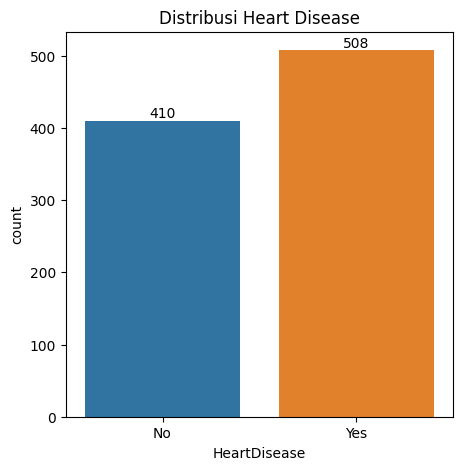

In [43]:
# Mengecek jumlah siswa yang dropout dan lulus 
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x = 'HeartDisease')

# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Distribusi Heart Disease')
plt.show

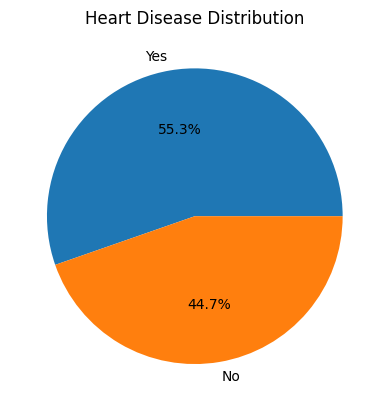

In [44]:
heart_disease_counts = df['HeartDisease'].value_counts()

plt.pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%')

plt.title('Heart Disease Distribution')

plt.show()

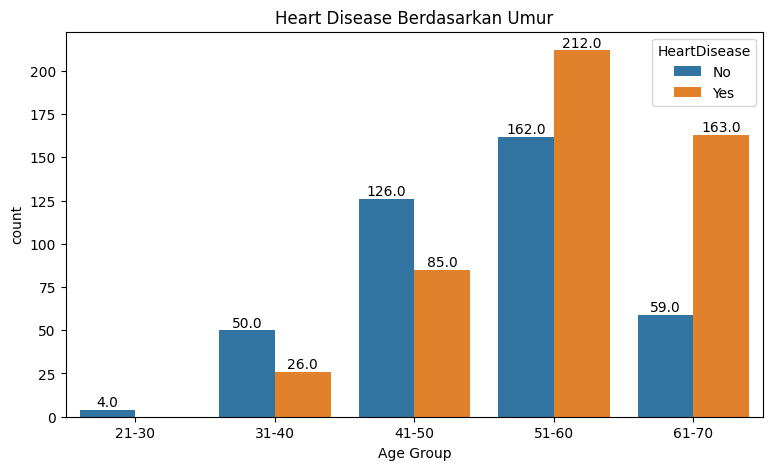

In [8]:
# Lakukan binning untuk age
bins = [20, 30, 40, 50, 60, 70]
labels = ['21-30', '31-40', '41-50', '51-60', '61-70']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(9, 5))
ax = sns.countplot(data=df, x='Age Group', hue='HeartDisease')

# Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Heart Disease Berdasarkan Umur')
plt.show()

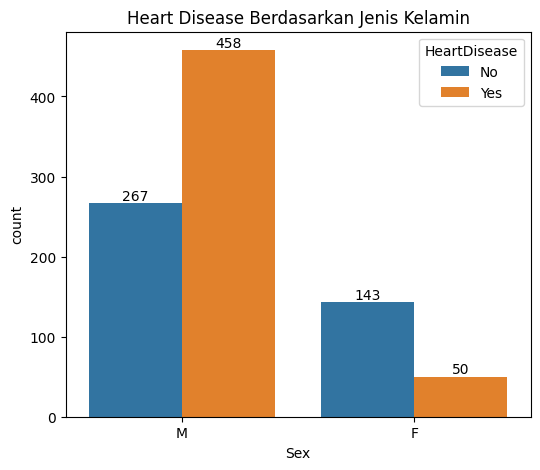

In [9]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='Sex', hue='HeartDisease')

#  Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Heart Disease Berdasarkan Jenis Kelamin')
plt.show()

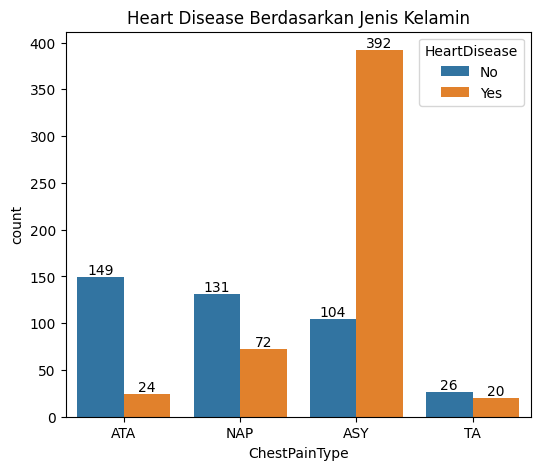

In [10]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='ChestPainType', hue='HeartDisease')

#  Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Heart Disease Berdasarkan Tipe Chest Pain')
plt.show()

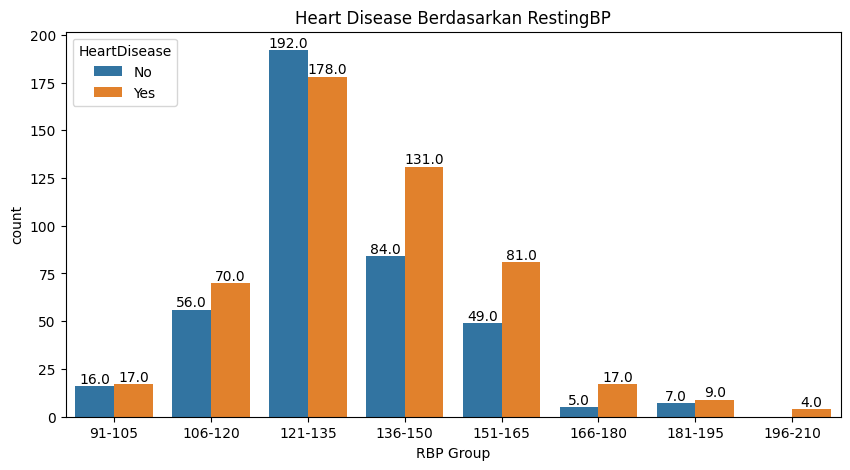

In [13]:
# Lakukan binning untuk age
bins = [90, 105, 120, 135, 150, 165, 180, 195, 210]
labels = ['91-105', '106-120', '121-135', '136-150', '151-165', '166-180', '181-195', '196-210']
df['RBP Group'] = pd.cut(df['RestingBP'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='RBP Group', hue='HeartDisease')

# Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Heart Disease Berdasarkan RestingBP')
plt.show()

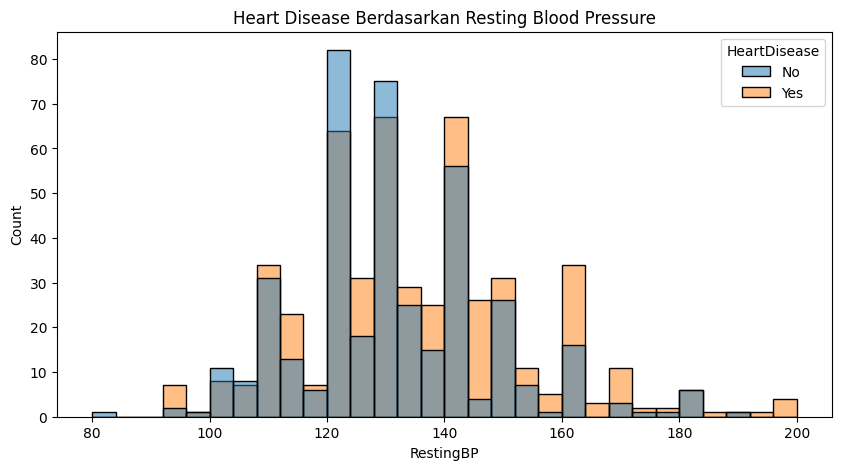

In [47]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='RestingBP', hue='HeartDisease')

plt.title('Heart Disease Berdasarkan Resting Blood Pressure')
plt.show()

In [17]:
df['RestingBP'].replace(0, df['RestingBP'].median(),inplace=True)

#### Setelah handling outliers

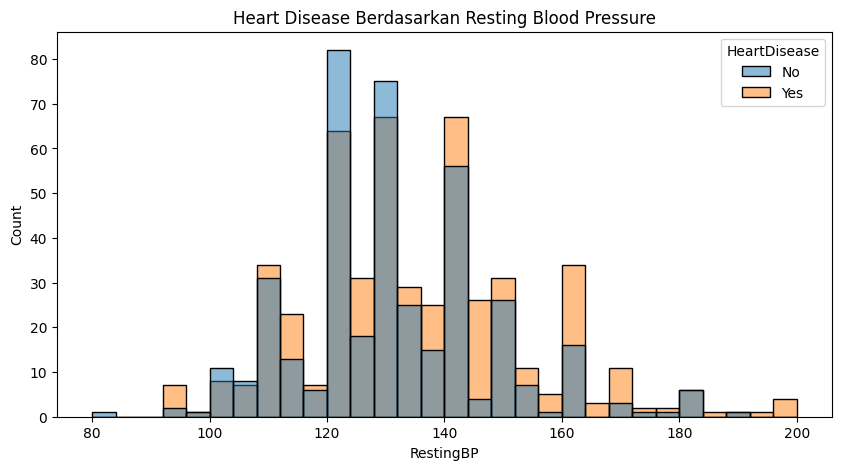

In [23]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='RestingBP', hue='HeartDisease')

plt.title('Heart Disease Berdasarkan Resting Blood Pressure')
plt.show()

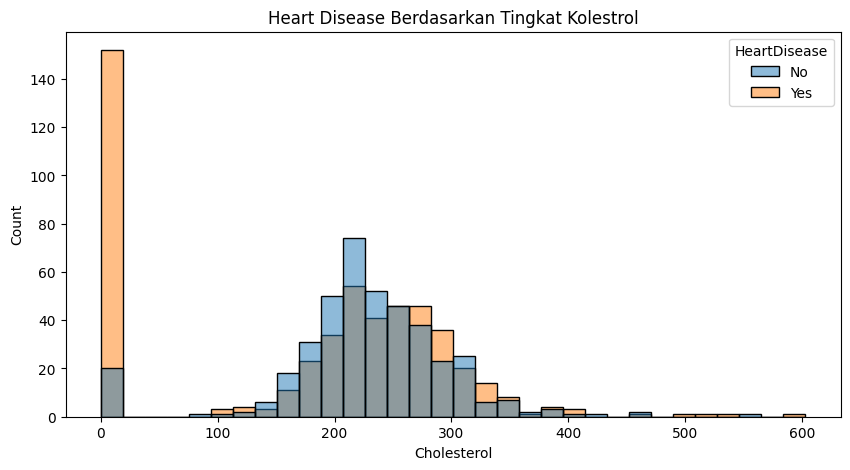

In [25]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='Cholesterol', hue='HeartDisease')

plt.title('Heart Disease Berdasarkan Tingkat Kolestrol')
plt.show()

In [26]:
df['Cholesterol'].replace(0, df['Cholesterol'].median(),inplace=True)

#### Setelah handling outliers

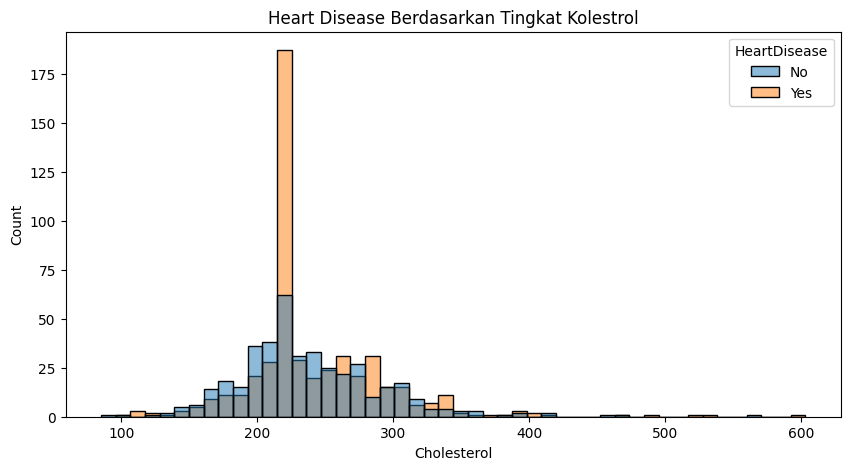

In [27]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='Cholesterol', hue='HeartDisease')

plt.title('Heart Disease Berdasarkan Tingkat Kolestrol')
plt.show()

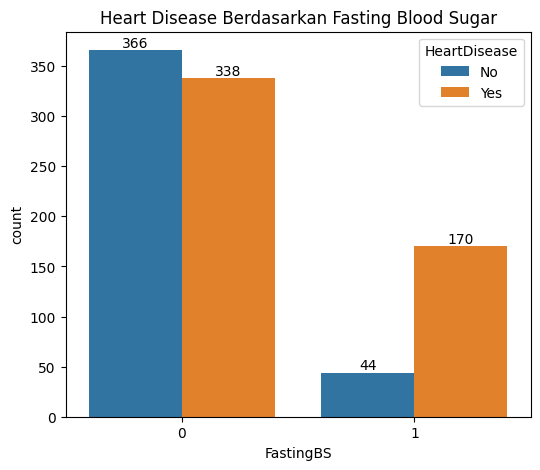

In [28]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='FastingBS', hue='HeartDisease')

#  Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Heart Disease Berdasarkan Fasting Blood Sugar')
plt.show()

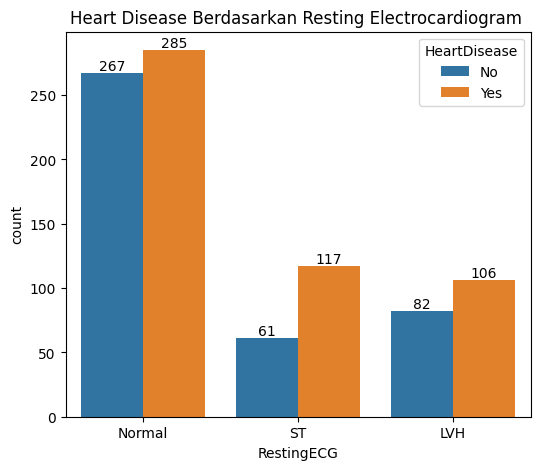

In [31]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='RestingECG', hue='HeartDisease')

#  Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Heart Disease Berdasarkan Resting Electrocardiogram ')
plt.show()

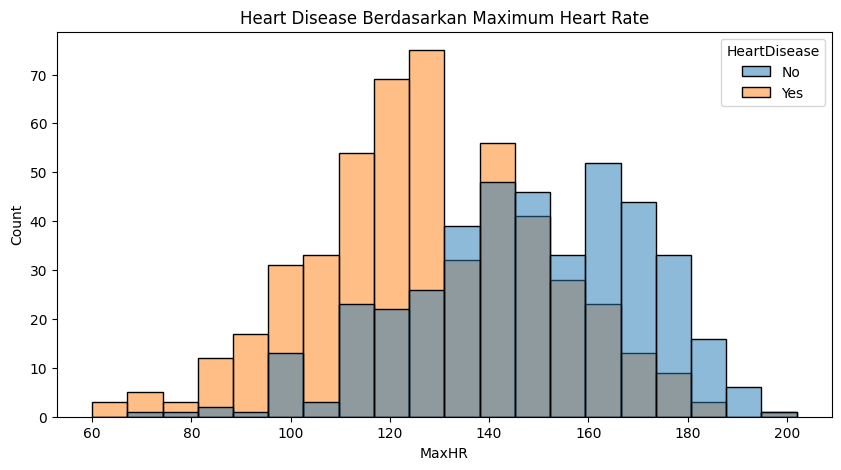

In [32]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='MaxHR', hue='HeartDisease')

plt.title('Heart Disease Berdasarkan Maximum Heart Rate')
plt.show()

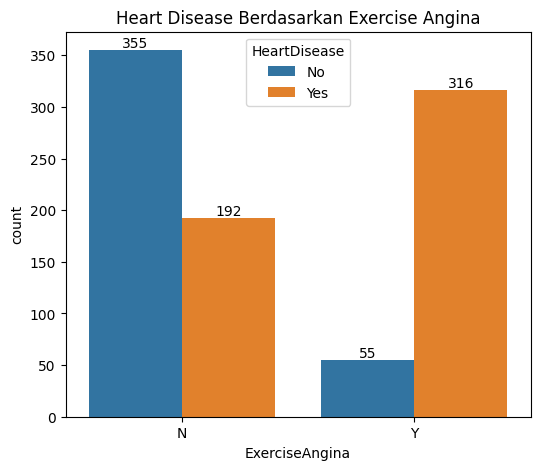

In [33]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='ExerciseAngina', hue='HeartDisease')

#  Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Heart Disease Berdasarkan Exercise Angina')
plt.show()

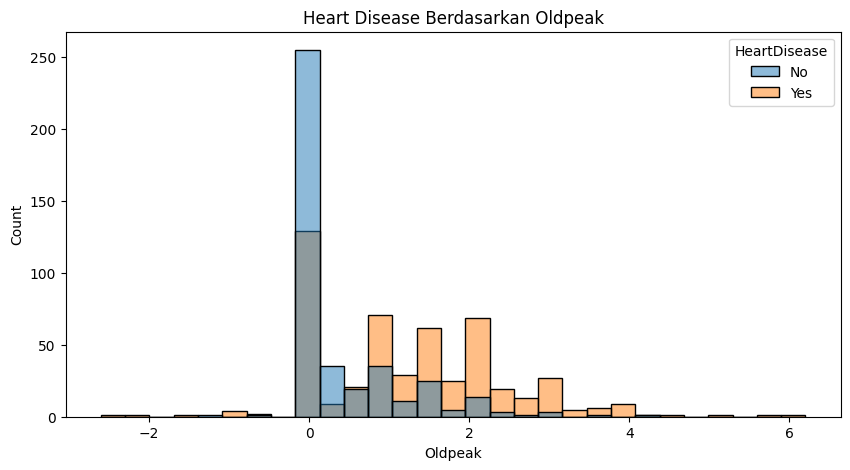

In [36]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(data=df, x='Oldpeak', hue='HeartDisease')

plt.title('Heart Disease Berdasarkan Oldpeak')
plt.show()

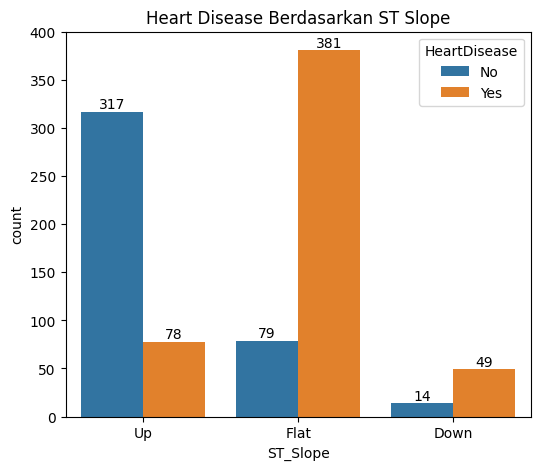

In [38]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='ST_Slope', hue='HeartDisease')

#  Memberi anotasi
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Heart Disease Berdasarkan ST Slope')
plt.show()